In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

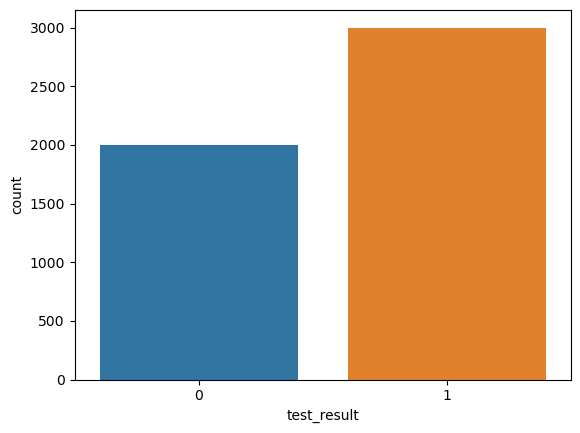

In [7]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

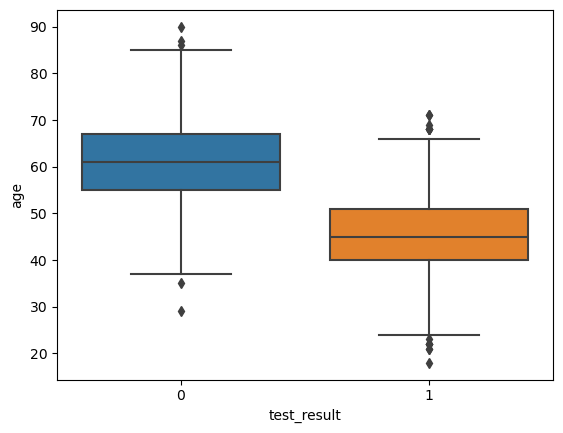

In [8]:
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

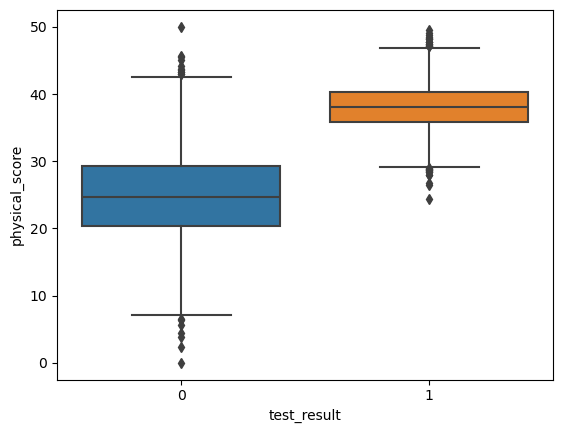

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

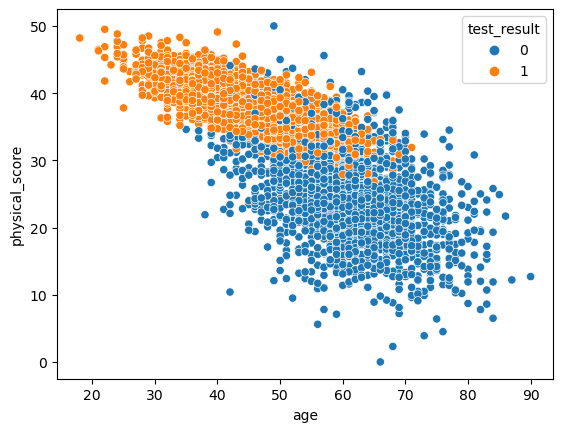

In [10]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

C:\Users\Ebo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ebo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


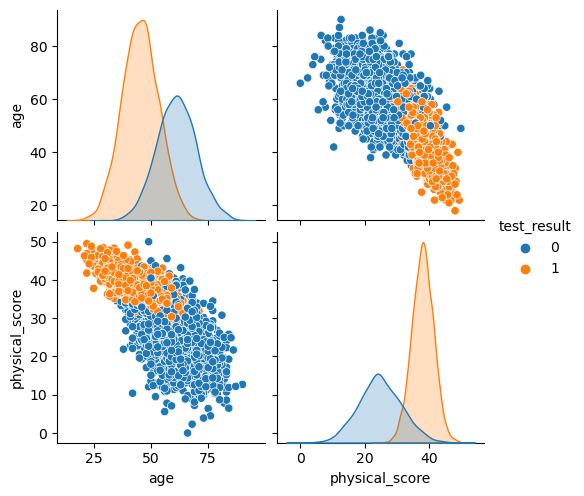

In [11]:
sns.pairplot(df,hue='test_result')

<Axes: >

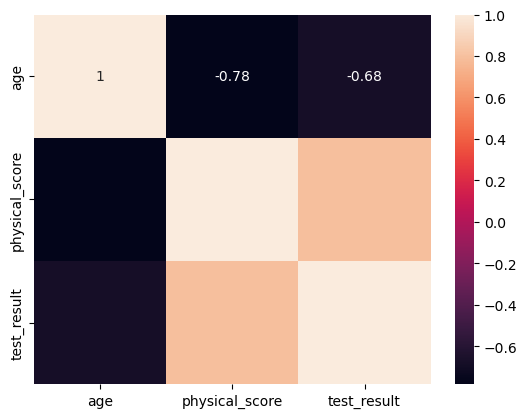

In [12]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

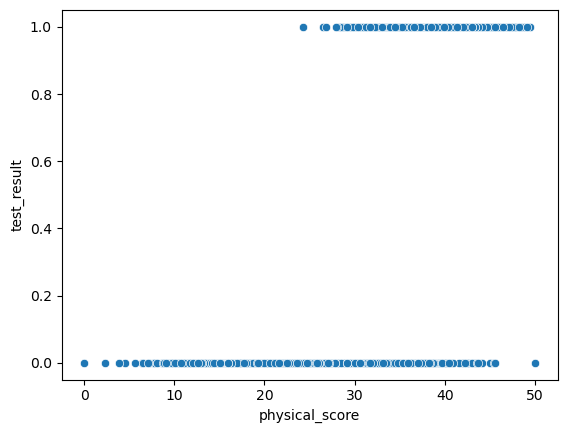

In [13]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<Axes: xlabel='age', ylabel='test_result'>

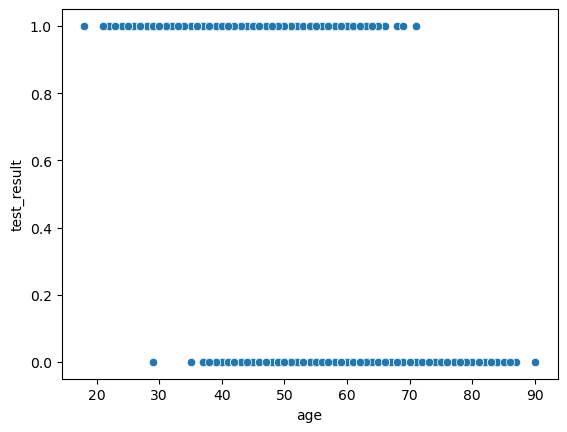

In [14]:
sns.scatterplot(x='age',y='test_result',data=df)

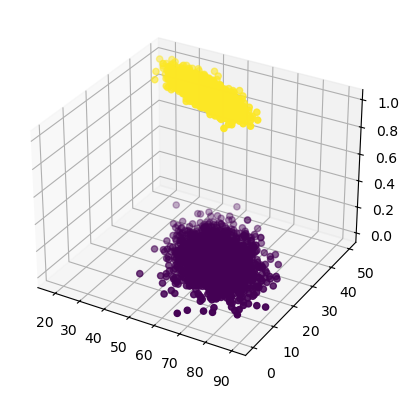

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [16]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# help(LogisticRegression)
# help(LogisticRegressionCV)

log_model = LogisticRegression()

In [23]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [24]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
print(accuracy_score(y_test, y_pred))

0.93


In [28]:
print(confusion_matrix(y_test, y_pred))

[[172  21]
 [ 14 293]]


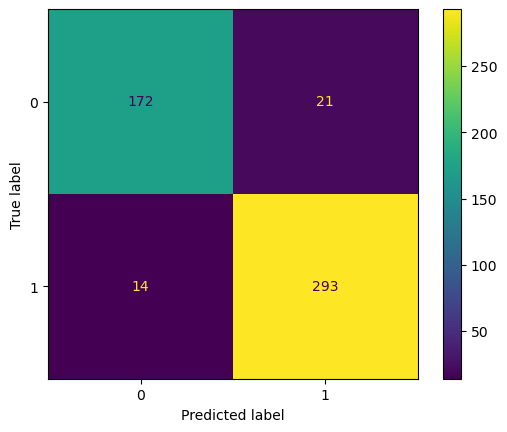

In [29]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

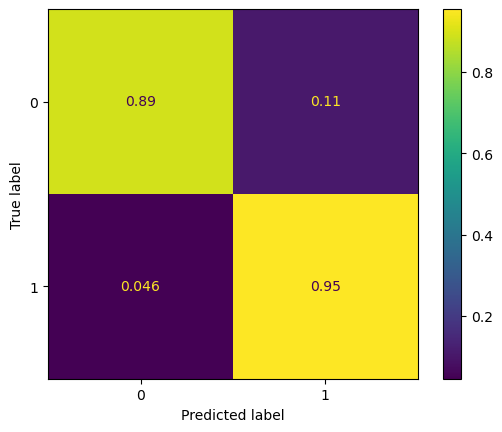

In [30]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [32]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [33]:
y_train.iloc[0]

1

In [34]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1,-1))

array([[0., 1.]])

In [35]:
log_model.predict(X_train.iloc[0].values.reshape(1,-1))

array([1], dtype=int64)

In [36]:
from sklearn.metrics import precision_recall_curve, roc_curve

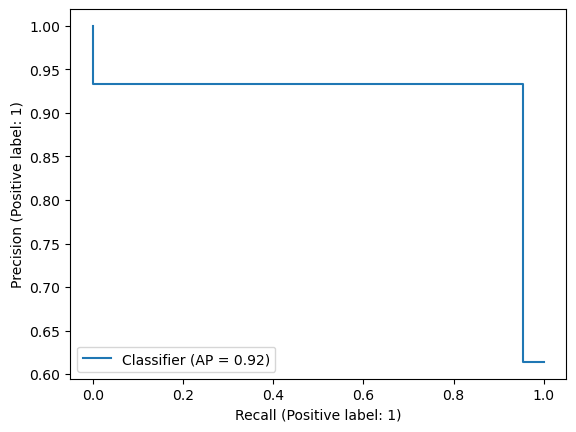

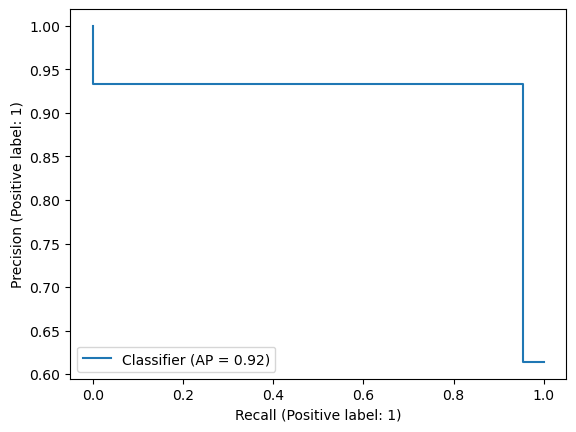

In [37]:
# Import the modules
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Create the display object
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)

# Plot the curve
disp.plot()

# Show the plot
plt.show()

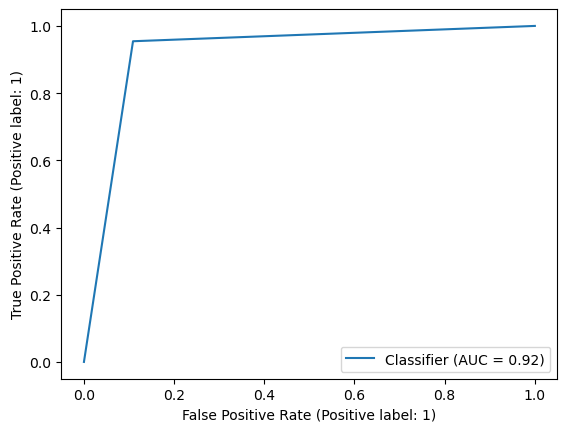

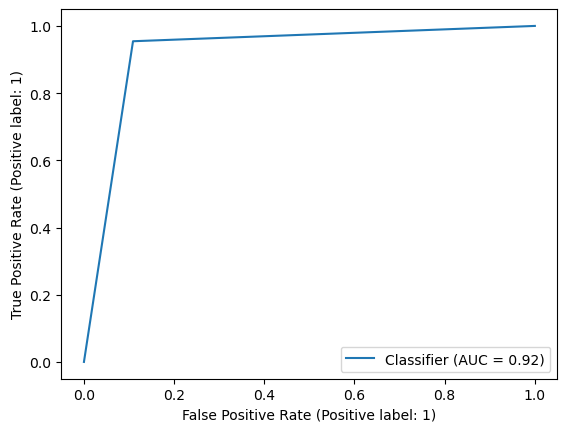

In [38]:
# Import the modules
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Create the display object
disp = RocCurveDisplay.from_predictions(y_test, y_pred)

# Plot the curve
disp.plot()

# Show the plot
plt.show()